모수 검정

### 0.데이터 다운로드

In [1]:
!git clone https://github.com/Soyoung-Yoon/data_02

'data_02'에 복제합니다...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
오브젝트를 받는 중: 100% (72/72), 448.82 KiB | 3.62 MiB/s, 완료.
델타를 알아내는 중: 100% (18/18), 완료.


In [2]:
!git clone https://github.com/Soyoung-Yoon/bigdata

'bigdata'에 복제합니다...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 50
오브젝트를 받는 중: 100% (53/53), 14.21 MiB | 2.29 MiB/s, 완료.
델타를 알아내는 중: 100% (15/15), 완료.


In [3]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
!pip install scipy==1.6.0

### 1.정규성 검정(Normality Test)
- 귀무가설 - 데이터셋이 정규분포를 따른다
- 대립가설 - 데이터셋이 정규분포를 따르지 않는다
- 유의수준 0.05 인 경우 : p-value > 0.05, 정규성이 보장된다고 할 수 있다
- 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleepage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [5]:
# 그룹을 나누어 저장함
g1 = df['stime20s']
g2 = df['stime40s']

In [9]:
# 정규성 검정 - 1 shapiro wilks test 
from scipy.stats import shapiro

g1_s, g1_p = shapiro(g1)
g2_s, g2_p = shapiro(g2)

print(f'Group 1: shapiro test statistis - {g1_s:.4f}, p-value - {g1_p:.4f}')
print(f'Group 2: shapiro test statistis - {g2_s:.4f}, p-value - {g2_p:.4f}')

Group 1: shapiro test statistis - 0.9239, p-value - 0.1180
Group 2: shapiro test statistis - 0.8810, p-value - 0.0184


In [18]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다

g1_s, g1_p = kstest(g1, "norm")
g2_s, g2_p = kstest(g2, "norm")

print(f'Group 1: shapiro test statistis - {g1_s:.4f}, p-value - {g1_p:.4f}')
print(f'Group 2: shapiro test statistis - {g2_s:.4f}, p-value - {g2_p:.4f}')

Group 1: shapiro test statistis - 0.9987, p-value - 0.0000
Group 2: shapiro test statistis - 1.0000, p-value - 0.0000


In [21]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest, norm
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다

g1_s, g1_p = kstest(g1, norm.cdf)
g2_s, g2_p = kstest(g2, norm.cdf)

print(f'Group 1: shapiro test statistis - {g1_s:.4f}, p-value - {g1_p:.4f}')
print(f'Group 2: shapiro test statistis - {g2_s:.4f}, p-value - {g2_p:.4f}')

Group 1: shapiro test statistis - 0.9987, p-value - 0.0000
Group 2: shapiro test statistis - 1.0000, p-value - 0.0000


In [24]:
# 정규성 검정 - 3 normaltest  (20개 이상의 데이터 필요)  # 20개입니다!
from scipy.stats import normaltest

g1_s, g1_p = normaltest(g1)
g2_s, g2_p = normaltest(g2)

print(f'Group 1: shapiro test statistis - {g1_s:.4f}, p-value - {g1_p:.4f}')
print(f'Group 2: shapiro test statistis - {g2_s:.4f}, p-value - {g2_p:.4f}')

Group 1: shapiro test statistis - 1.1732, p-value - 0.5562
Group 2: shapiro test statistis - 2.0450, p-value - 0.3597


In [32]:
# 정규성 검정 - 4 anderson darling test
# 검정통계량 < 임계값, 정규성이 보장된다고 할 수 있다
from scipy.stats import anderson

r1 = anderson(g1)
r2 = anderson(g2, dist='norm')

print('Group 1: ', *r1) # Significant Level 10% 이하 수준에서 정규성 만족
print('Group 2: ', *r2) # Significant Level 1% 수준에서 정규성 만족 

Group 1:  0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
Group 2:  0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]


### 2.등분산성 검정
- burtlett : 데이터셋의 크기가 서로 다른 2개 이상의 집단 사용 가능
- levene, fligner : 정규성을 충족하지 않는 비모수 데이터에 대해서도 사용가능 (중앙을 median으로 설정)

#### 2-1.iris 데이터
- 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인

In [34]:
# 파일 읽어와 내용 확인
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [121]:
# [1] target='sepal_length', 품종별 그룹을 나누어 저장함
import pandas as pd

target_feature = 'petal_width'

groups = [ x for x in iris.groupby('species')[target_feature]]
groups_x = [x.to_list() for name, x in groups]

In [122]:
# [2] burtlett 검정
from scipy.stats import shapiro, bartlett

# 정규성검정
for name, x in groups:
    pvalue = shapiro(x.tolist())[1]
    print(f'{name:10s} : shapiro-wilk p-value - {pvalue:.4f} - {"정규성 만족" if pvalue > 0.05 else "정규성 만족하지 않음"}')
    
# 등분산성 검정
s, pvalue = bartlett(*groups_x)
print(f'Bartlett-Kellin p-value: {pvalue:.4f} - {"등분산성 만족" if pvalue > 0.05 else "등분산성 만족하지 않음"}')

setosa     : shapiro-wilk p-value - 0.0000 - 정규성 만족하지 않음
versicolor : shapiro-wilk p-value - 0.0273 - 정규성 만족하지 않음
virginica  : shapiro-wilk p-value - 0.0870 - 정규성 만족
Bartlett-Kellin p-value: 0.0000 - 등분산성 만족하지 않음


In [123]:
# [3] levene 의 center는 'mean'으로 지정
from scipy.stats import bartlett, levene

s, pvalue = levene(*groups_x, center='mean')
print(f'Levene p-value: {pvalue:.4f} - {"등분산성 만족" if pvalue > 0.05 else "등분산성 만족하지 않음"}')

Levene p-value: 0.0000 - 등분산성 만족하지 않음


In [124]:
# [4] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import bartlett, levene, fligner

s, pvalue = fligner(*groups_x, center='trimmed', proportiontocut=0.05)
print(f'Levene p-value: {pvalue:.4f} - {"등분산성 만족" if pvalue > 0.05 else "등분산성 만족하지 않음"}')

Levene p-value: 0.0000 - 등분산성 만족하지 않음


#### 2-2.tips 데이터
- 요일별 total_bill 의 등분산성 검정
- levene의 median, trimmed 사용

In [125]:
# 파일 읽어와 내용 확인
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [142]:
# [1] target = 'total_bill', 요일별 그룹을 나누어 저장함
import pandas as pd

target = 'tip'

groups = [x for x in tips.groupby('day')[target]]
groups_x = [x.to_list() for _, x in groups]

In [143]:
# [2] levene 의 center는 'median'으로 지정
from scipy.stats import shapiro, kstest, normaltest, anderson
from scipy.stats import bartlett, levene, fligner

# 정규성 검정
for name, x in groups:
    pvalue = shapiro(x.to_list())[1]
    print(f'{name:5s} : shapiro-wilk p-value {pvalue:,.4f} -> {"정규성 만족" if pvalue > 0.05 else "정규성 불만족"}')

# 등분산성 검정
s, pvalue = bartlett(*groups_x)
print(f'Bartlett p-value: {pvalue:.4f} -> {"등분산성 만족" if pvalue > 0.05 else "등분산성 불만족"}')

s, pvalue = levene(*groups_x, center='mean')
print(f'Levene(mean) p-value: {pvalue:.4f} -> {"등분산성 만족" if pvalue > 0.05 else "등분산성 불만족"}')

s, pvalue = fligner(*groups_x, center='trimmed', proportiontocut=0.05)
print(f'Fligner(trimmed) p-value: {pvalue:.4f} -> {"등분산성 만족" if pvalue > 0.05 else "등분산성 불만족"}')

Thur  : shapiro-wilk p-value 0.0000 -> 정규성 불만족
Fri   : shapiro-wilk p-value 0.8497 -> 정규성 만족
Sat   : shapiro-wilk p-value 0.0000 -> 정규성 불만족
Sun   : shapiro-wilk p-value 0.0263 -> 정규성 불만족
Bartlett p-value: 0.0117 -> 등분산성 불만족
Levene(mean) p-value: 0.6716 -> 등분산성 만족
Fligner(trimmed) p-value: 0.9604 -> 등분산성 만족


In [144]:
# [3] fligner의 center는 'trimmed', proportiontocut=5% 지정
from scipy.stats import fligner


### 3.T 검정(평균 검정)

t-test 이해
- 스튜던트 t-테스트(Student's t-test)라고도 하며, 검정 통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정
- 표본을 사용한 모평균 검정 및 두 데이터 세트(집단)의 모평균이 서로 유의하게 다른지 여부를 판별 할 수 있음
- 검정통계량이 정규 분포를 따르며 모집단의 분산, 표준편차를 알지 못할 때 표본으로 부터 추정된 분산/표준편차를 사용해 검정함
- t-test를 실시하기 위해서는 정규성 및 등분산성의 조건이 만족되어야 함


#### 3-1.One sample t-test
- stats.ttest_1samp 사용
- 20대 평균 수면시간에 대한 one samle t-test
- 유의수준은 5% 사용
- 숫자는 반올림하여 소수점 아래 4번째 자리까지 표시

In [ ]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd

df = pd.read_csv("./data_02/sleepage.csv")
print(df.shape)
df.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [ ]:
# [1] 20대의 수면시간에 대해 정규성 검정
# one sample이므로 등분산 검정 필요 없음
from scipy.stats import shapiro


In [ ]:
# [2] 20대의 수면시간에 대해 평균 구하기


가설 1.alternative='two-sided'
- 귀무가설 - 20대 수면시간의 평균은 6시간이다.
- 대립가설 - 20대 수면시간의 평균은 6시간이 아니다.

In [ ]:
# [3] One Sample t-test 수행
from scipy.stats import ttest_1samp


In [ ]:
# [4] 가설 결과


가설-2. alternative='less'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 크거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 작다

In [ ]:
# [5] One Sample t-test 수행
from scipy.stats import ttest_1samp


In [ ]:
# [6] 가설 결과


가설-3. alternative='greater'
- 귀무가설 - 20대 수면시간의 평균은 6시간 보다 작거나 같다.
- 대립가설 - 20대 수면시간의 평균은 6시간 보다 크다

In [ ]:
# [7] One Sample t-test 수행
from scipy.stats import ttest_1samp


In [ ]:
# [8] 가설 결과


In [ ]:
# [9] 95% 신뢰구간 구하기
from scipy.stats import t, sem


#### 3-2.Two-sample t-test
- 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 20대와 40대의 수면 시간은 같다
- stats.test_ind : (two INDependent sample이라 해서 ttest_ind )
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- t값과 two-tail p-value를 반환함
- ttest_ind(a, b, equal_var=False) : Welch's t-test 수행 (등분산이 아닌 경우)

In [ ]:
# [1] 수면 시간 정보가 포함된 파일 불러오기
import pandas as pd
df2 = pd.read_csv('./data_02/sleepage.csv')
print(df2.shape)
df2.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


In [ ]:
# [2] 그룹 분할하기


In [ ]:
# [3] 그룹별 평균 구하기


In [ ]:
# [4] 등분산 검정 - 3가지 방법으로 실행 후, pvalue 확인
from scipy.stats import levene, fligner, bartlett
from scipy.stats import shapiro

# 정규성 검정


# 등분산성 검정


In [ ]:
# 등분산 가정을 만족하지 않으면(equal_var=False) Welch's T-test를 수행한다.

가설1. alternative='two-sided'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0과 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0과 같지 않다
- 귀무가설 : groupA, groupB의 평균은 동일하다
- 대립가설 : groupA, groupB의 평균은 동일하지 않다

In [ ]:
# [5] two-sample t-test 수행
from scipy.stats import ttest_ind


In [ ]:
# [6] 가설 결과


가설2. alternative='less'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 크거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 작다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 크거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 작다

In [ ]:
# [7] two-sample t-test 수행
from scipy.stats import ttest_ind


In [ ]:
# [8] 가설 결과


가설3. alternative='greater'
- 귀무가설 : groupA의 평균 - groupB의 평균이 0보다 작거나 같다
- 대립가설 : groupA의 평균 - groupB의 평균이 0보다 크다
- 귀무가설 : groupA의 평균이 groupB의 평균보다 작거나 같다
- 대립가설 : groupA의 평균이 groupB의 평균보다 크다

In [ ]:
# [9] two-sample t-test 수행

from scipy.stats import ttest_ind


In [ ]:
# [10] 가설 결과


#### 3-3.Paired t-test 
- 동일한 특성을 같는 두집단 A, B의 평균 차이가 유의미한지 확인하는 용도
- 처치 전/후 비교(효과 검정), 한 집단에 대해 두 가지 방법에 대한 차이 검정 등에 사용
- 등분산성 검정은 하지 않아도 됨
- 두 약 투여에 따른 추가 수면 시간 평균의 차이가 있는가?
- stats.ttest_rel: (two RELated samples)

In [ ]:
# [1] 데이터 가져오기
import pandas as pd
import numpy as np
df2 = pd.read_csv('./data_02/sleep.csv')
print(df2.shape)
df2.T

(20, 3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
extra,0.7,-1.6,-0.2,-1.2,-0.1,3.4,3.7,0.8,0.0,2.0,1.9,0.8,1.1,0.1,-0.1,4.4,5.5,1.6,4.6,3.4
group,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [ ]:
# [2] 그룹 나누기


In [ ]:
# [3] 정규성 검정(shapiro)
from scipy.stats import shapiro



In [ ]:
# [4] 정규성 검정(normaltest) - N>=20
from scipy.stats import  normaltest



In [ ]:
# [5] gA와 gB의 평균 구하기



가설1. alternative='two-sided'
- 귀무가설 : gA의 평균 - gB의 평균이 0과 같다
- 대립가설 : gA의 평균 - gB의 평균이 0과 같지 않다
- 귀무가설 : gA와 gB의 평균은 같다
- 대립가설 : gA와 gB의 평균은 같지 않다

In [ ]:
# [6] Paired t-test
from scipy.stats import ttest_rel



In [ ]:
# [7] 결과해석



가설2. alternative='less'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 크거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 작다
- 귀무가설 : gA의 평균이 gB의 평균보다 크거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 작다

The t-statistic is calculated as np.mean(a - b)/se, where se is the standard error. Therefore, the t-statistic will be positive when the sample mean of a - b is greater than zero and negative when the sample mean of a - b is less than zero

In [ ]:
# [8] Paired t-test
from scipy.stats import ttest_rel



In [ ]:
# [9] 결과해석



가설3. alternative='greater'
- 귀무가설 : gA의 평균 - gB의 평균이 0보다 작거나 같다
- 대립가설 : gA의 평균 - gB의 평균이 0보다 크다
- 귀무가설 : gA의 평균이 gB의 평균보다 작거나 같다
- 대립가설 : gA의 평균이 gB의 평균보다 크다

In [ ]:
# [10] Paired t-test
from scipy.stats import ttest_rel



In [ ]:
# [11] 결과해석



#### 3-4.분류 모델에서 활용

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/1st_Train.csv')
data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


1개 연속형 변수, 1개 범주형 변수 (2개 범주)
- 범주별로 연속형 변수의 평균 차이가 있는지 검정한다

**정규성을 만족하지 않는 경우 Wilcoxon rank sum test, Mann-Whitney U test를 사용하는 것이 좋습니다.  여기에서는 t-test를 사용했습니다.**
**정규성을 만족하지 않는 경우 등분산성 검정의 경우 levene을 사용하는 것이 좋습니다.**

In [ ]:
# t-test
# 연속형 변수 : 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
# 범주형 변수 : 'Reached.on.Time_Y.N'

from scipy.stats import shapiro, kstest, bartlett
from scipy.stats import ttest_ind

# [1] 그룹 나누기



# [2] 정규성, 등분산성 검정

# [3] ttest_ind

# [4] 결론


In [ ]:
def my_ttest_ind(data, feature, target):
    group0 = data.loc[data[target] == 0, feature]
    group1 = data.loc[data[target] == 1, feature]
    mean_g0, mean_g1 = group0.mean(), group1.mean()
    print(f'{mean_g0:.4f}, {mean_g1:.4f}')
    _, pvalue = ttest_ind(group0, group1)
    print(f'ttest_ind - p-value:{pvalue:.4f}')
    print('유의미' if pvalue < 0.05 else '의미가 없다')

# 'Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered'
for feature in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']:
    print(feature)
    my_ttest_ind(data, feature, 'Reached.on.Time_Y.N') 

#### 3-5.모평균에 관한 t-test
A 회사에서 판매하는 모니터는 평균 5개 보다 적은 불량화소를 포함한다고 주장한다. 이 주장을 판단하기 위해서 데이터를 수집했으며, 주어진 데이터(data_02/defective.csv)에는 모니터 25개에서 조사한 불량화소 개수가 저장되어 있다. 
- 불량화소의 개수는 정규분포를 따른다고 할 때, 이 주장의 타당성 여부를 유의수준 5%에서 검정하여라
- 𝑯_𝟎  : 𝝁≥𝟓, 𝑯_𝟏  : 𝝁<𝟓, defective_pixel :  불량화소 개수
- (a) 불량화소의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.



In [ ]:
# 귀무가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 크거나 같다.
# 대립가설 : A 회사에서 판매하는 모니터의 불량화소 평균이 5개 보다 적다.

import pandas as pd
from scipy.stats import ttest_1samp



#### 3-6.작업3유형 예시문제
주어진 데이터(data_02/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다. 가설은 아래와 같다
- 𝑯_𝟎  : 𝝁_𝒅≥𝟎, 𝑯_𝟏  : 𝝁_𝒅<𝟎  (𝝁_𝒅 : 치료 후 혈압 – 치료 전 혈압)의 평균
- bp_before : 치료 전 혈압, bp_after : 치료 후 혈압
- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

# 귀무가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 크거나 같다.
# 대립가설: 치료 후 혈압과 치료 전 혈압의 차가 0보다 작다
# 귀무가설: 치료 후 혈압이 치료 전 혈압보다 크거나 같다.
# 대립가설: 치료 후 혈압이 치료 전 혈압보다 작다


### 4.ANOVA(분산 분석)
- t-test는 1개 또는 2개의 집단에 대해 평균 검정
- 독립변수 – 범주형, 종속변수 – 연속형으로 하는, 3개 이상의 집단 평균을 비교하는 모수 추론 방법
- "집단간분산" /"집단내분산"    기반의 F 분포를 이용해 가설을 검정하며 정규성, 등분산성, 독립성을 가정함
- "집단 간 분산"과 "집단 내 분산"을 이용해 분석하는 방법이어서 "분산분석"이라고 함
- 귀무가설 기각 시 구체적인 차이를 파악하기 위해, 사후 검정(Post Hoc test)이 필요함
- 등분산/동일 크기 표본 - Tukey검정, 등분산/다른 크기 표본 – Scheff 검정, Fisher’s LSD 검정 등이 있음


In [ ]:
#출처 : https://partrita.github.io/posts/ANOVA-python/
#https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/8_anovaOneway.ipynb
#https://ggbaker.ca/data-science/content/stats-tests.html    
#https://lunch-box.tistory.com/76?category=873052

#### 4-1.분산의 중요성
- 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보임
- 분산이 클수록 집단의 평균값의 차이가 무의미해진다
- **집단간 평균값의 분산이 클수록, 집단내 분산이 작아질 수록 평균의 차이가 분명해진다.**


In [ ]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4,3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)  
        y = np.arange(size) + i*size     
        plt.plot(x, y, '.', color=colors[i])
    plt.show() 

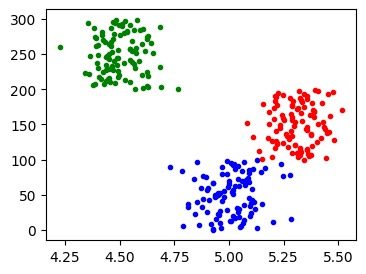

In [ ]:
draw_graph(std=0.1)

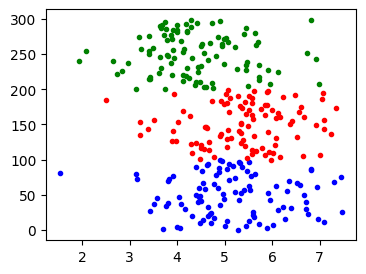

In [ ]:
draw_graph(std=1)

#### 4-2.일원분산분석(One-way ANOVA)
- 독립변수 : 범주형 1개, 종속변수 : 연속형
- 독립변수의 변화가 종속변수에 미치는 영향을 보기 위해 사용
- 가정 : 독립성, 정규성, 등분산성
- scipy.stats이나 statsmodel 라이브러리를 이용

In [ ]:
# 예시 데이터 설명
# iris의 target이 0 : 'setosa', 1 : 'versicolor', 2: 'virginica' 품종
# 독립변수 :'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'   
# 품종별 sepal, petal의 length, width가 차이를 보일까?에 anova 사용

In [ ]:
# [1] 데이터 가져오기
import pandas as pd

iris = pd.read_csv('bigdata/iris_data.csv')
iris.columns = ['sepal_length', 'sepal_width', 
                'petal_length', 'petal_width', 'target']
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [ ]:
# [2-1] 품종별 각 변수의 평균 확인


In [ ]:
# [2-2] 특정 변수에 대한 품종별 평균 확인


In [ ]:
# group 0, 1, 2의 평균의 차이가 있습니다
# 평균값의 차이가 실제로 의미가 있는 차이인지 알고 싶다면,
# 분산 분석을 통해 통계적 유의성을 알아 볼 수 있습니다.

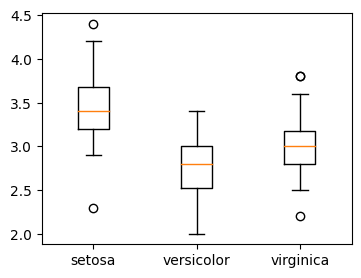

In [ ]:
# [3] 그룹 추출 및 그래프로 확인
import matplotlib.pyplot as plt

data = [x[1].values for x in iris.groupby('target')[feature]]

plt.figure(figsize=(4,3))
plt.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

In [ ]:
# [4] 정규성 확인 
# p-value가 0.05 보다 큰 값일 때 정규성을 갖음
from scipy.stats import shapiro


In [ ]:
# [5] 등분산성 확인
# p-value가 0.05 보다 큰 값일 때 등분산성을 갖음
from scipy.stats import bartlett


Scipy.stats 으로 일원분산분석
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [ ]:
# [6] 일원분산분석 - 1
from scipy.stats import f_oneway


iris 데이터의 일원분산분석 결과 : F=49.2, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미한 차이가 있음


pandas 와 statsmodels 를 사용한 일원분산분석
- https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html 

ols (ordinary least squares) 모델 
- 구하려는 해와 실제의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법

'value ~ C(treatment)' : '종속변수 ~ C(독립변수)'
- value : 종속변수
- treatment : 범주형(C)인 독립변수
- df : degree of freedom
- C(treatment)의 df : 그룹의 수 - 1
- Residual의 df : 전체 데이터 수 - 그룹의 수

In [ ]:
# [7] 일원분산분석 - 2
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [ ]:
# C(target)의 PR(=p-value) 값이 0.05 보다 작으므로 그룹의 
# 평균값이 통계적으로 유의미하게 차이가 있음

In [ ]:
# 구체적으로 어떤 집단이 차이가 있는지 확인하려면 사후분석(post hoc tests)를 해야함
# 유의미한 차이가 없는 경우는 사후분석할 필요가 없음

사후검정(Post Hoc Analysis)
- ANOVA 분석의 문제 : 다르다는 것은 알지만, 어떤 집단간의 차이가 있는지는 알 수 없음
- 사후검정을 통해 어떤 것에 차이가 있는지 찾을 수 있음
- post hoc은 라틴어로 "after this"의 뜻
- 사후검정의 종류
    - Tukey's HSD (Honest Significant Difference) test : 정규분포, 등분산, 동일 표본 크기에서 가장 많이 사용
    - Duncan’s new multiple range test (MRT) : 정규분포, 등분산, 동일 표본 크기에서 사용, 엄격하지 않은 기준으로 통계적 유의성을 도출하기 쉬움
    - Scheffé’s Method : 가장 보수적이고 엄격한 사후검정방식 (동일하지 않은 표본 크기)
- 민감도(sensitivity)로 구분 : Scheffe < Tukey < Duncan
- Duncan의 방법은 작은 차이에도 차이가 난다라고 하지만, Scheffe의 방법은 확실한 차이가 나야만 비로소 차이가 있다라고 판단함


Tukey test
- statsmodels의 Tukey test를 하기 위해서는 DataFrame의 형태를 변경해야 함
- 하나의 컬럼은 분류할수 있는 이름(label)을 다른 컬럼은 실험값(values)를 가지고 있는 형태이어야 함

[참고] scheffe : https://eunholand.tistory.com/96

In [ ]:
# [7] 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
# 결과를 보면 모든 그룹에서 통계적인 유의미성(P-value < 0.05)을 가질 수 있는것을 확인 할 수 있음

In [ ]:
# [8] 그림으로 확인하기


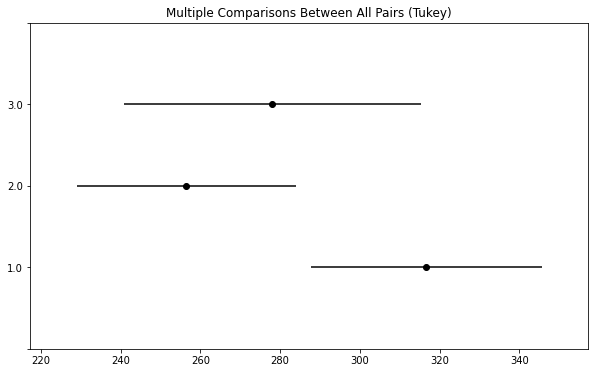

In [ ]:
# 통계적 의미 갖지 않는 경우
# 그림에서 볼 수 있듯이, 그룹 1.0과 2.0은 서로 겹치지 않는것을 볼 수 있음
# 반면,1과 3, 2와 3은 겹치기 때문에 유의미한 차이가 없다고 할 수 있음

In [ ]:
##  23년 5월 31일 오전 - 여기까지

#### 4-3.이원분산분석(Two-way ANOVA)
- 독립변인의 수가 두 개일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect) 즉, 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용됨
- scipy.stats이나 statsmodels 라이브러리를 이용

예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다. 
4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 
이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

In [ ]:
# [1] 데이터 가져오기
import pandas as pd
data = pd.read_csv('data_02/altman.csv')
data.tail()

,head_size,fetus,observer
31,12.7,3.0,3.0
32,12.5,3.0,3.0
33,13.0,3.0,4.0
34,12.9,3.0,4.0
35,13.8,3.0,4.0


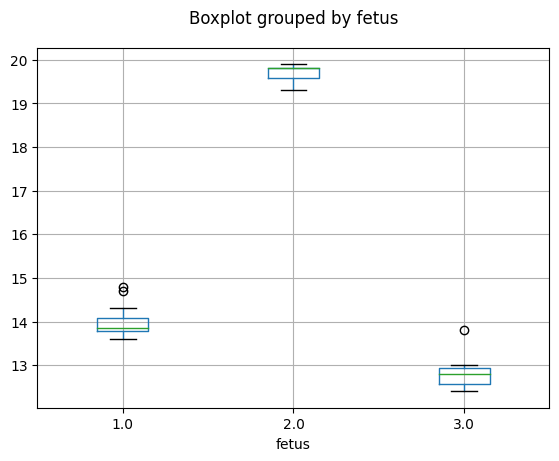

In [ ]:
# [2] 태아별 머리 둘레 plot 만들기
import matplotlib.pyplot as plt
data.boxplot(column='head_size', by='fetus' , grid=True)
plt.title('')
plt.show()

In [ ]:
# [3] 태아별 머리 둘레 평균을 구해봅니다
data.groupby('fetus')['head_size'].mean()

fetus
1.0    13.991667
2.0    19.691667
3.0    12.825000
Name: head_size, dtype: float64

In [ ]:
# 그림에서 태아(fetus) 3명의 머리 둘레는 차이가 있어 보입니다.
# 관측자와 태아에 상호작용 효과 여부를 Two way ANOVA를 통해 알아 보겠습니다

In [ ]:
# 귀무가설 : 관측자별 머리둘레 평균은 동일하다
# 대립가설 : 관측자별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 태아별 머리둘레 평균은 동일하다
# 대립가설 : 태아별 머리둘레 평균은 동일하지 않다 (차이가 있다)
# 귀무가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
# 대립가설 : 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 있다

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [ ]:
# C(fetus):C(observer)의 P-value 가 0.05 이상 입니다, 
# 따라서 귀무가설을 기각할 수 없고. 
# 머리둘레평균에 대해 측정자와 태아에 상호작용 효과가 없다
